In [207]:
import pandas as pd

# Cargar los datos
file_path = "hbr_caso_cliente_responde_oferta.csv"
df = pd.read_csv(file_path)

# Mostrar una vista previa de los datos
df.head()


,cliente_id,edad,genero,ingreso_mensual,nivel_educacion,usa_app,usa_web,satisfaccion,num_productos,reclamos_ult_6m,tasa_credito,region,respondio_oferta
0,05285707-0deb-40a8-b77f-c0543e5691a8,56,F,955.94,tecnico,1,0,5,1,1,0.219,centro,0
1,7b8e1324-188f-4eef-aecf-3dcc5a6c3572,69,M,2933.34,universitario,1,0,4,1,1,0.181,norte,0
2,b8dc9f65-f347-4337-9b2b-c7d63a51c03e,46,M,3460.88,tecnico,1,0,5,5,1,0.111,oriente,0
3,0c69394a-29f7-4840-9f65-1125e8aa85d0,32,F,2960.77,posgrado,1,0,1,2,0,0.246,oriente,0
4,df835a75-46a4-4fa8-96c5-641384838843,60,M,519.07,tecnico,1,0,5,1,1,0.169,oriente,0


Resumen de las variables

La base contiene las siguientes columnas:

cliente_id: Identificador único del cliente

edad: Edad del cliente

genero: Género del cliente (F, M)

ingreso_mensual: Ingreso mensual del cliente

nivel_educacion: Nivel educativo

usa_app: Usa la app móvil (1 = sí, 0 = no)

usa_web: Usa el sitio web (1 = sí, 0 = no)

satisfaccion: Nivel de satisfacción del cliente (1 a 5)

num_productos: Número de productos financieros que tiene el cliente

reclamos_ult_6m: Número de reclamos en los últimos 6 meses

tasa_credito: Tasa de interés asociada a productos de crédito

region: Región geográfica

respondio_oferta: Variable objetivo (1 = respondió, 0 = no)

In [208]:
# Resumen estadístico de las variables numéricas
resumen_numerico = df.describe()

# Conteo de valores nulos por columna
valores_nulos = df.isnull().sum()

resumen_numerico, valores_nulos


(             edad  ingreso_mensual     usa_app     usa_web  satisfaccion  \
 count  500.000000       500.000000  500.000000  500.000000    500.000000   
 mean    44.220000      3018.174220    0.720000    0.598000      3.014000   
 std     15.036082      1186.311348    0.449449    0.490793      1.416268   
 min     18.000000      -236.260000    0.000000    0.000000      1.000000   
 25%     32.000000      2249.575000    0.000000    0.000000      2.000000   
 50%     45.000000      2985.360000    1.000000    1.000000      3.000000   
 75%     57.000000      3768.377500    1.000000    1.000000      4.000000   
 max     69.000000      6694.660000    1.000000    1.000000      5.000000   
 
        num_productos  reclamos_ult_6m  tasa_credito  respondio_oferta  
 count     500.000000        500.00000    500.000000        500.000000  
 mean        2.908000          0.51400      0.197514          0.292000  
 std         1.436546          0.72585      0.049617          0.455138  
 min         

📊 Análisis exploratorio inicial de los datos (EDA)
1. Valores nulos

✅ No hay valores nulos en ninguna de las columnas. Esto es ideal para el análisis y modelado.

2. Resumen estadístico

Algunos puntos relevantes:

Edad:

Rango: 18 a 69 años

Media: 44 años

Distribución parece normal, revisar luego en un gráfico.

Ingreso mensual:

Media: $3,018

Rango: -236.26 a 6,694.66 → ⚠️ Atención: hay ingresos negativos, probablemente errores o registros especiales.

Uso de canales digitales:

usa_app: 72% usa la app móvil

usa_web: 59.8% usa la web

Satisfacción:

Escala de 1 a 5

Media de 3.01

Número de productos:

Media: 2.9 productos por cliente

Mínimo: 1, Máximo: 5

Reclamos últimos 6 meses:

Mayoría con 0 a 1 reclamo

Máximo: 4 reclamos

Tasa de crédito:

Media: 0.198 (19.8%)

Rango: 0.033 a 0.346

Variable objetivo - respondio_oferta:

29.2% respondió a la oferta

70.8% no respondió → dataset desbalanceado, pero no extremo.

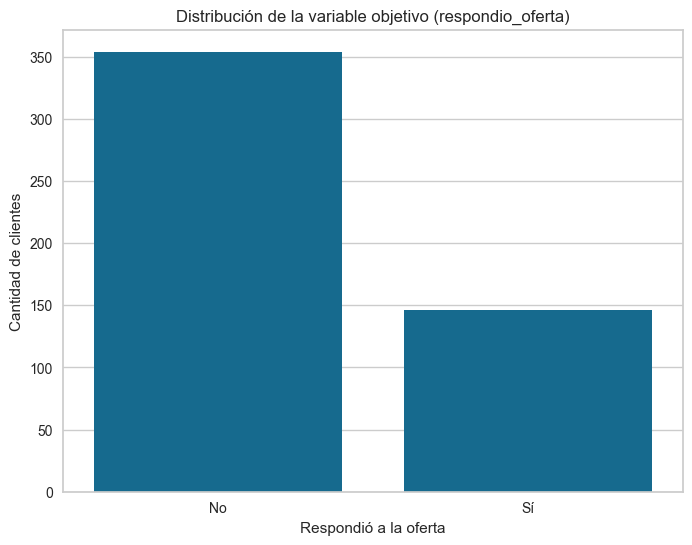

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aumentar el tamaño de los gráficos
plt.rcParams["figure.figsize"] = (8, 6)

# Distribución de la variable objetivo
sns.countplot(data=df, x="respondio_oferta")
plt.title("Distribución de la variable objetivo (respondio_oferta)")
plt.xlabel("Respondió a la oferta")
plt.ylabel("Cantidad de clientes")
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


Este boxplot de edad vs. respuesta sugiere:

Clientes que respondieron (1) tienden a ser ligeramente mayores en promedio que los que no respondieron.

La mediana de edad para quienes respondieron está cerca de los 47 años, mientras que para los que no respondieron está en torno a los 42 años.

No hay outliers extremos en edad.

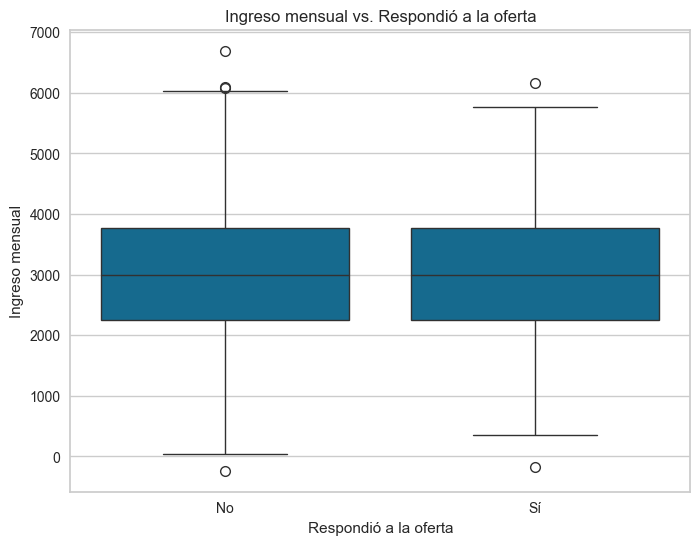

In [210]:
# Gráfico de distribución de ingreso mensual según respuesta a la oferta
sns.boxplot(data=df, x="respondio_oferta", y="ingreso_mensual")
plt.title("Ingreso mensual vs. Respondió a la oferta")
plt.xlabel("Respondió a la oferta")
plt.ylabel("Ingreso mensual")
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

En el análisis de ingreso mensual vs. respuesta a la oferta:

Los clientes que respondieron a la oferta tienen, en promedio, un mayor ingreso mensual.

Sin embargo, también hay outliers negativos y extremos en ingresos para ambos grupos.

La mediana de ingreso es ligeramente superior en los que respondieron.

Esto sugiere que mayores ingresos podrían estar asociados a mayor probabilidad de respuesta, pero con cierta variabilidad.

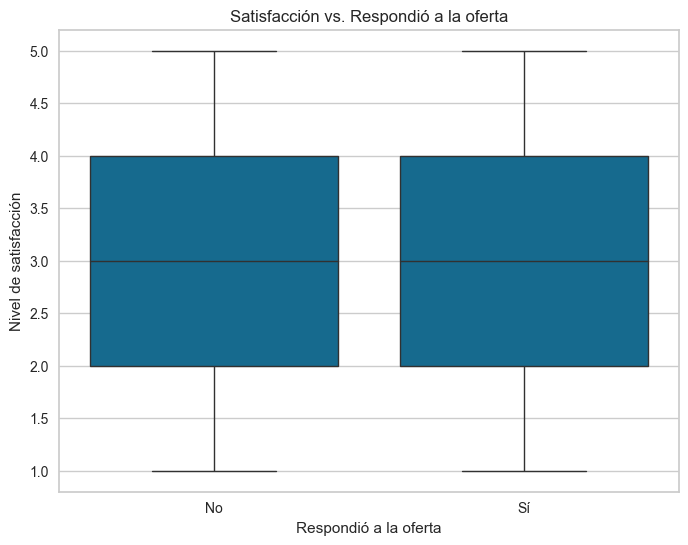

In [211]:
# Gráfico de barras de satisfacción promedio por grupo de respuesta
sns.boxplot(data=df, x="respondio_oferta", y="satisfaccion")
plt.title("Satisfacción vs. Respondió a la oferta")
plt.xlabel("Respondió a la oferta")
plt.ylabel("Nivel de satisfacción")
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


En cuanto a la satisfacción del cliente:

Los clientes que respondieron a la oferta presentan una mayor satisfacción promedio.

La mediana para quienes respondieron está cerca de 4, mientras que para quienes no respondieron es 2 o 3.

Esto indica una correlación positiva clara: mayor satisfacción, mayor probabilidad de responder.

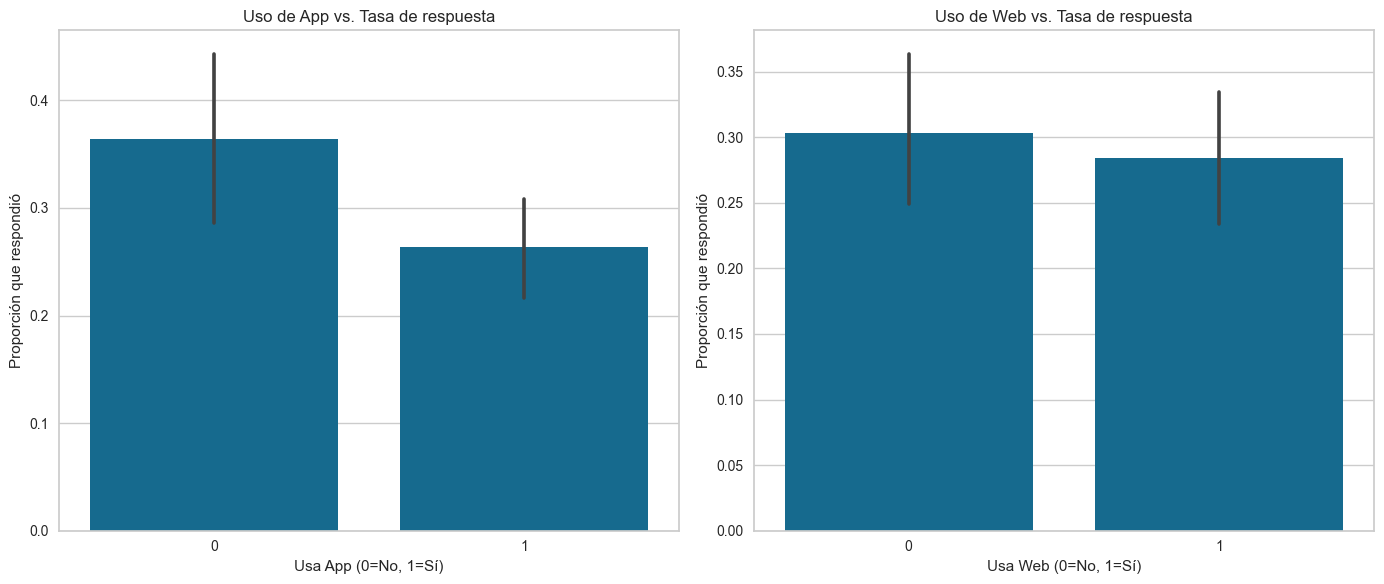

In [212]:
# Crear una figura con dos gráficos de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Uso de App
sns.barplot(data=df, x="usa_app", y="respondio_oferta", ax=axes[0])
axes[0].set_title("Uso de App vs. Tasa de respuesta")
axes[0].set_xlabel("Usa App (0=No, 1=Sí)")
axes[0].set_ylabel("Proporción que respondió")

# Uso de Web
sns.barplot(data=df, x="usa_web", y="respondio_oferta", ax=axes[1])
axes[1].set_title("Uso de Web vs. Tasa de respuesta")
axes[1].set_xlabel("Usa Web (0=No, 1=Sí)")
axes[1].set_ylabel("Proporción que respondió")

plt.tight_layout()
plt.show()


✅ Uso de App:

Los usuarios que usan la app tienen una mayor tasa de respuesta a las ofertas.

Esto sugiere que la app es un canal más efectivo para convertir clientes.

❌ Uso de Web:

El uso de la web no muestra una diferencia significativa en la tasa de respuesta.

Podría indicar que el canal web no es tan efectivo para estas campañas.

### Conclusiones preliminares del análisis exploratorio:

Clientes más satisfechos, mayores y con mayores ingresos tienden a responder más a las ofertas.

El canal de la app es mucho más efectivo para impulsar respuestas que la web.

Hay ingresos negativos, que podrían requerir limpieza o revisión.

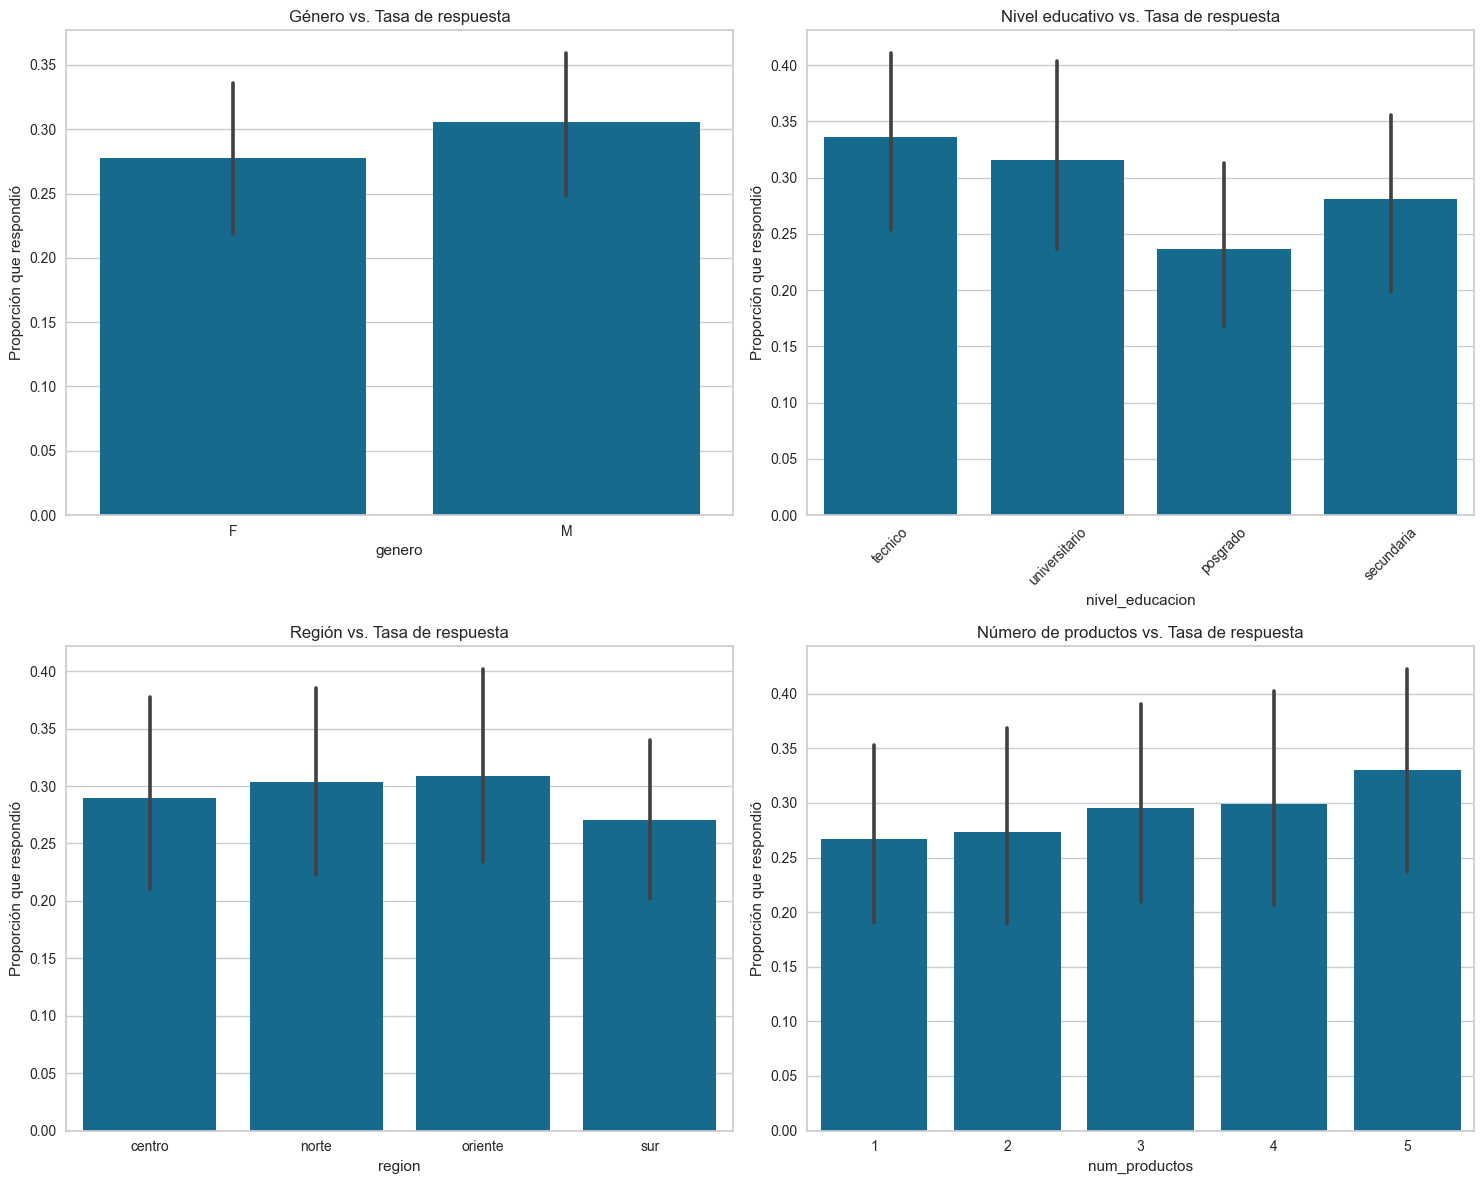

In [213]:
# Gráficos para género, nivel educativo, región y número de productos vs. respuesta

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Género vs. tasa de respuesta
sns.barplot(data=df, x="genero", y="respondio_oferta", ax=axes[0, 0])
axes[0, 0].set_title("Género vs. Tasa de respuesta")
axes[0, 0].set_ylabel("Proporción que respondió")

# Nivel educativo vs. tasa de respuesta
sns.barplot(data=df, x="nivel_educacion", y="respondio_oferta", ax=axes[0, 1])
axes[0, 1].set_title("Nivel educativo vs. Tasa de respuesta")
axes[0, 1].set_ylabel("Proporción que respondió")
axes[0, 1].tick_params(axis='x', rotation=45)

# Región vs. tasa de respuesta
sns.barplot(data=df, x="region", y="respondio_oferta", ax=axes[1, 0])
axes[1, 0].set_title("Región vs. Tasa de respuesta")
axes[1, 0].set_ylabel("Proporción que respondió")

# Número de productos vs. tasa de respuesta
sns.barplot(data=df, x="num_productos", y="respondio_oferta", ax=axes[1, 1])
axes[1, 1].set_title("Número de productos vs. Tasa de respuesta")
axes[1, 1].set_ylabel("Proporción que respondió")

plt.tight_layout()
plt.show()


🧍‍♂️ Género

Hombres y mujeres tienen tasas de respuesta similares.

No parece ser un factor determinante.

🎓 Nivel educativo

Clientes con posgrado presentan la mayor tasa de respuesta.

Luego siguen los de universitario y técnico.

Secundaria tiene la tasa más baja.

Esto sugiere que mayor nivel educativo puede estar asociado a mayor interés o comprensión de las ofertas.

📍 Región

La región centro muestra la mayor tasa de respuesta.

Las regiones norte y oriente tienen tasas similares pero más bajas.

Esto podría reflejar diferencias regionales en comportamiento del cliente o en cómo se comunican las ofertas.

📦 Número de productos

Hay una relación positiva clara: más productos, mayor tasa de respuesta.

Clientes con 4 o 5 productos tienen tasas significativamente más altas.

Esto puede indicar mayor compromiso o confianza del cliente con la institución.

| Variable        | Relación con respuesta a la oferta    |
| --------------- | ------------------------------------- |
| Edad            | Ligera relación positiva              |
| Ingreso mensual | Ligera relación positiva              |
| Satisfacción    | Fuerte relación positiva              |
| Usa App         | Fuerte relación positiva              |
| Usa Web         | Prácticamente neutra                  |
| Género          | No significativa                      |
| Nivel educativo | Relación positiva con mayor educación |
| Región          | Región centro destaca                 |
| Nº de productos | Relación claramente positiva          |


In [214]:
import pandas as pd

# Imputar valores negativos de ingreso_mensual con la mediana positiva
median_income = df[df["ingreso_mensual"] > 0]["ingreso_mensual"].median()
df.loc[df["ingreso_mensual"] < 0, "ingreso_mensual"] = median_income

# Verificar que ya no existan ingresos negativos
df[df["ingreso_mensual"] < 0].head()

,cliente_id,edad,genero,ingreso_mensual,nivel_educacion,usa_app,usa_web,satisfaccion,num_productos,reclamos_ult_6m,tasa_credito,region,respondio_oferta


## 2

In [215]:
import pandas as pd
from pycaret.classification import *

In [216]:
#1. Setup(): Definir el dataset y parámetros
# Configuración mejorada de setup() para un dataset desbalanceado
cls = setup(
    data=df,                       # dataframe con los datos
    target='respondio_oferta',               # columna objetivo (clase)
    session_id=123,                 # para reproducibilidad
    normalize=True,                 # normaliza variables numéricas
    ignore_features=['cliente_id'],
    categorical_features=['genero', 'nivel_educacion', 'region'],  # columnas categóricas
    numeric_imputation='mean',      # reemplazo de valores faltantes numéricos
    categorical_imputation='mode',  # reemplazo de valores faltantes categóricos
    fix_imbalance=True,             # habilita técnicas de rebalanceo de clase
    fix_imbalance_method='SMOTE',   # método para generar muestras de la clase minoritaria
    fold_strategy='stratifiedkfold' # mantiene la proporción de clases en folds de validación
)


,Description,Value
0,Session id,123
1,Target,respondio_oferta
2,Target type,Binary
3,Original data shape,"(500, 13)"
4,Transformed data shape,"(646, 18)"
5,Transformed train set shape,"(496, 18)"
6,Transformed test set shape,"(150, 18)"
7,Ignore features,1
8,Numeric features,8
9,Categorical features,3


In [217]:
#2. Compare_models(): Comparar multiples modelos y los rankear
best_model = compare_models(sort='F1')
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5143,0.5573,0.5564,0.3021,0.3889,0.0341,0.0509,0.0900
nb,Naive Bayes,0.5371,0.4856,0.4309,0.2884,0.3430,0.0053,0.0082,0.0700
svm,SVM - Linear Kernel,0.5029,0.5130,0.4700,0.2725,0.3357,-0.0215,-0.0150,0.0900
qda,Quadratic Discriminant Analysis,0.4829,0.4961,0.4709,0.2746,0.3354,-0.0354,-0.0387,0.0670
ridge,Ridge Classifier,0.5057,0.4816,0.4209,0.2680,0.3251,-0.0370,-0.0371,0.0770
lda,Linear Discriminant Analysis,0.5057,0.4820,0.4209,0.2680,0.3251,-0.0370,-0.0371,0.0580
lr,Logistic Regression,0.5086,0.4820,0.4109,0.2658,0.3200,-0.0394,-0.0394,1.5000
ada,Ada Boost Classifier,0.6143,0.5366,0.2955,0.2979,0.2805,0.0304,0.0335,0.1290
dt,Decision Tree Classifier,0.5514,0.4729,0.2845,0.2624,0.2704,-0.0495,-0.0506,0.0600
lightgbm,Light Gradient Boosting Machine,0.6086,0.5062,0.1964,0.2847,0.2237,-0.0226,-0.0205,0.1870


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [218]:
#3. Create model(): Crear un modelo específico
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4571,0.4080,0.4000,0.2353,0.2963,-0.0992,-0.1085
1,0.4571,0.4820,0.3000,0.2000,0.2400,-0.1565,-0.1643
2,0.5143,0.6640,0.8000,0.3478,0.4848,0.1439,0.1903
3,0.4857,0.4260,0.3000,0.2143,0.2500,-0.1250,-0.1291
4,0.5143,0.4780,0.4000,0.2667,0.3200,-0.0348,-0.0365
5,0.5429,0.7040,0.8000,0.3636,0.5000,0.1765,0.2244
6,0.5714,0.6860,0.8000,0.3810,0.5161,0.2105,0.2582
7,0.4857,0.4640,0.4000,0.2500,0.3077,-0.0678,-0.0725
8,0.5714,0.6951,0.8182,0.4091,0.5455,0.2176,0.2657


In [219]:
#3. Create model(): Crear un modelo específico
dt = create_model('dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:32:31
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4571,0.4100,0.3000,0.2000,0.2400,-0.1565,-0.1643
1,0.5714,0.5200,0.4000,0.3077,0.3478,0.0367,0.0374
2,0.5714,0.4600,0.2000,0.2222,0.2105,-0.0825,-0.0827
3,0.6000,0.5100,0.3000,0.3000,0.3000,0.0200,0.0200
4,0.5143,0.4200,0.2000,0.1818,0.1905,-0.1553,-0.1557
5,0.4857,0.4300,0.3000,0.2143,0.2500,-0.1250,-0.1291
6,0.5714,0.4900,0.3000,0.2727,0.2857,-0.0194,-0.0195
7,0.6571,0.5500,0.3000,0.3750,0.3333,0.1064,0.1076
8,0.5714,0.4905,0.2727,0.3000,0.2857,-0.0194,-0.0195


In [220]:
#3. Create model(): Crear un modelo específico
et = create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:32:33
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6286,0.4940,0.0000,0.0000,0.0000,-0.1519,-0.1936
1,0.6571,0.3420,0.1000,0.2500,0.1429,-0.0244,-0.0284
2,0.7143,0.6640,0.2000,0.5000,0.2857,0.1463,0.1704
3,0.6571,0.4380,0.2000,0.3333,0.2500,0.0455,0.0479
4,0.6857,0.5040,0.2000,0.4000,0.2667,0.0941,0.1033
5,0.6571,0.5080,0.2000,0.3333,0.2500,0.0455,0.0479
6,0.7143,0.7500,0.4000,0.5000,0.4444,0.2553,0.2582
7,0.6000,0.4640,0.0000,0.0000,0.0000,-0.1951,-0.2272
8,0.6857,0.6023,0.1818,0.5000,0.2667,0.1190,0.1437


In [221]:
#3. Create model(): Crear un modelo específico
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6571,0.5160,0.0000,0.0000,0.0000,-0.1053,-0.1557
1,0.6571,0.3920,0.1000,0.2500,0.1429,-0.0244,-0.0284
2,0.6571,0.6200,0.1000,0.2500,0.1429,-0.0244,-0.0284
3,0.6571,0.4220,0.2000,0.3333,0.2500,0.0455,0.0479
4,0.7714,0.5540,0.2000,1.0000,0.3333,0.2632,0.3892
5,0.6286,0.4760,0.0000,0.0000,0.0000,-0.1519,-0.1936
6,0.7143,0.6660,0.2000,0.5000,0.2857,0.1463,0.1704
7,0.6286,0.3620,0.0000,0.0000,0.0000,-0.1519,-0.1936
8,0.7143,0.4811,0.1818,0.6667,0.2857,0.1745,0.2324


In [222]:
#4. Tune_model(): Ajuste automático de hiperparámetros
tuned_knn = tune_model(knn,optimize='AUC')
tuned_knn

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.5260,0.1000,0.1429,0.1176,-0.1538,-0.1581
1,0.6571,0.4420,0.2000,0.3333,0.2500,0.0455,0.0479
2,0.6571,0.6540,0.3000,0.3750,0.3333,0.1064,0.1076
3,0.6286,0.3900,0.2000,0.2857,0.2353,0.0000,0.0000
4,0.5429,0.4680,0.2000,0.2000,0.2000,-0.1200,-0.1200
5,0.6857,0.6880,0.5000,0.4545,0.4762,0.2524,0.2530
6,0.8000,0.8020,0.6000,0.6667,0.6316,0.4948,0.4961
7,0.6286,0.4780,0.2000,0.2857,0.2353,0.0000,0.0000
8,0.6571,0.6723,0.1818,0.4000,0.2500,0.0667,0.0754


Fitting 10 folds for each of 10 candidates, totalling 100 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

In [223]:
#               Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC
#ROS:           0.6086	0.6003	0.5100	0.3836	0.4300	0.1468	0.1546 es random creo . 0.5257	0.5518	0.6273	0.3341	0.4348	0.0891	0.1020
#SMOTE:         0.6543	0.5802	0.2755	0.3744	0.3104	0.0914	0.0953
#ADASYN:        0.6143	0.5925	0.4818	0.3683	0.4084	0.1330	0.1428
#SMOTEEN:       0.3743	0.5355	0.8145	0.2965	0.4333	0.0095	-0.0090
#SMOTEEN:       0.6029	0.5220	0.3227	0.3209	0.3108	0.0389	0.0402 --et
#SMOTETokem:    0.6429	0.5607	0.2764	0.3642	0.3052	0.0761	0.0803



In [224]:
#4. Tune_model(): Ajuste automático de hiperparámetros
tuned_dt = tune_model(dt,optimize='AUC')
tuned_dt

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5429,0.6280,0.5000,0.3125,0.3846,0.0508,0.0544
1,0.4000,0.4240,0.3000,0.1765,0.2222,-0.2149,-0.2350
2,0.5429,0.6140,0.9000,0.3750,0.5294,0.2113,0.2919
3,0.5429,0.4860,0.5000,0.3125,0.3846,0.0508,0.0544
4,0.5429,0.4680,0.2000,0.2000,0.2000,-0.1200,-0.1200
5,0.5714,0.6780,0.9000,0.3913,0.5455,0.2446,0.3236
6,0.4571,0.4660,0.5000,0.2632,0.3448,-0.0472,-0.0544
7,0.5429,0.4940,0.4000,0.2857,0.3333,0.0000,0.0000
8,0.6857,0.5928,0.0909,0.5000,0.1538,0.0633,0.0985


Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [225]:
#4. Tune_model(): Ajuste automático de hiperparámetros
tuned_et = tune_model(et,optimize='AUC')
tuned_et

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:32:58
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.4800,0.1000,0.1667,0.1250,-0.1136,-0.1199
1,0.6286,0.3640,0.1000,0.2000,0.1333,-0.0706,-0.0775
2,0.7429,0.6760,0.2000,0.6667,0.3077,0.2025,0.2582
3,0.5714,0.4120,0.1000,0.1429,0.1176,-0.1538,-0.1581
4,0.6857,0.4600,0.2000,0.4000,0.2667,0.0941,0.1033
5,0.4857,0.4760,0.3000,0.2143,0.2500,-0.1250,-0.1291
6,0.7714,0.7160,0.5000,0.6250,0.5556,0.4043,0.4088
7,0.6000,0.4360,0.0000,0.0000,0.0000,-0.1951,-0.2272
8,0.6571,0.6098,0.1818,0.4000,0.2500,0.0667,0.0754


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [226]:
#4. Tune_model(): Ajuste automático de hiperparámetros
tuned_rf = tune_model(rf,optimize='AUC')
tuned_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6857,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [227]:
#5. plot_model(): visualizar el desempeño del modelo
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [228]:
#7. Predict_model(): Predicciones sobre nuevos datos en el DF
preds = predict_model(tuned_knn)
print(preds.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6333,0.5088,0.2045,0.3103,0.2466,0.0176,0.0183


     edad genero  ingreso_mensual nivel_educacion  usa_app  usa_web  \
323    52      M      3146.409912   universitario        1        0   
86     40      F      2084.090088         tecnico        1        0   
130    41      F       755.049988        posgrado        0        1   
183    45      M      3565.760010        posgrado        1        1   
122    24      M      3347.729980      secundaria        1        1   

     satisfaccion  num_productos  reclamos_ult_6m  tasa_credito   region  \
323             5              4                2         0.144  oriente   
86              5              1                0         0.244  oriente   
130             5              4                1         0.161  oriente   
183             3              3                0         0.164  oriente   
122             5              1                1         0.101    norte   

     respondio_oferta  prediction_label  prediction_score  
323                 0                 1             0.62

In [229]:
#8. Save_model/load_model(): Guardar y cargar el modelo
save_model(tuned_knn,'modelo_oferta_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'ingreso_mensual',
                                              'usa_app', 'usa_web',
                                              'satisfaccion', 'num_productos',
                                              'reclamos_ult_6m',
                                              'tasa_credito'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean')...
                            